500
1000
1500
2000
2500
3000
3500
4000
4500
5000
5500
6000
6500
7000
7500
8000
8500
9000
9500
10000
10500
11000
11500
12000
12500
ok
(12500, 32, 32, 3)
0.992188 -1.0


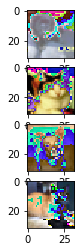

In [33]:
from scipy import misc
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

im_n = 12500

im_list = []
for i in range(1,im_n+1):
    im = misc.imresize(misc.imread("./test/{}.jpg".format(i)), (32,32) )
    im_list.append(im)
    if i%500 == 0 : print (i)
    
im_list = np.array(im_list, dtype=np.float32)
im_list = im_list - 128
im_list = im_list / 128

print ("ok")



print(im_list.shape)
print (np.max(im_list), np.min(im_list))

plt.subplot(411)
plt.imshow(im_list[500])
plt.subplot(412)
plt.imshow(im_list[501])
plt.subplot(413)
plt.imshow(im_list[502])
plt.subplot(414)
plt.imshow(im_list[503])


In [38]:
from keras.models import load_model
m = load_model("./cat_w2.h5")

preds = m.predict(im_list)
print (preds)

pr = preds[:,0]
print ("preds OK")

f = open('predictions.csv', 'w')
print("id,label", file=f)

for i, pp in zip(range(1, im_n+1), pr): 
    print("{},{}".format(i, pp), file=f)
f.close()
print("file OK")

[[ 0.85001647  0.14998345]
 [ 0.93570548  0.06429452]
 [ 0.48256174  0.51743823]
 ..., 
 [ 0.83013934  0.16986063]
 [ 0.97460866  0.02539137]
 [ 0.0822513   0.91774875]]
preds OK
file OK
